<a href="https://colab.research.google.com/github/aswathy7576/NLP-Document-clustering-NaiveBayes-Algorithm/blob/main/Naive_bayes_doc_clustering_final(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;sns.set()
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Dataset Preparation

In [ ]:
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
#Defining categories sor sports politics and health
categories = [
    "rec.sport.hockey",
    "sci.med",
    "talk.politics.misc",
]


print("Loading 20 newsgroups dataset for categories:")
print(categories)
#training data on selected categories
train = fetch_20newsgroups(
    subset="all", categories=categories, shuffle=True, random_state=42)

print("%d documents" % len(train.data))
print("%d categories" % len(train.target_names))
print()

Loading 20 newsgroups dataset for categories:
['rec.sport.hockey', 'sci.med', 'talk.politics.misc']
2764 documents
3 categories



In [ ]:
train.data

["From: LMARSHA@cms.cc.wayne.edu (Laurie Marshall)\nSubject: Re: Where's Roger?\nOrganization: Wayne State University, Detroit MI  U.S.A.\nLines: 25\nNNTP-Posting-Host: cms.cc.wayne.edu\n\nIn article <franjion.735590256@spot.Colorado.EDU>\nfranjion@spot.Colorado.EDU (John Franjione) writes:\n \n>Unfortunately, Roger is now over at r.s.baseball spewing his expertise\n>(i.e. being a dickhead).  I guess he is afraid of posting anything\n>here, because he knows what to expect.\n>--\n>John Franjione\n>Department of Chemical Engineering\n>University of Colorado, Boulder\n>franjion@spot.colorado.edu\n \n \n \n Hey, we could start a new game on the net.  It's called 'Where's Roger?'\nIt's similiar to 'Where's Waldo?' but instead of finding Waldo in a picture\nof people, we try to find Roger in a newsgroup on the net.\n I predict that he'll be in r.s.basketball.pro next.\n \n \n \nLaurie Marshall\nWayne State University\nDetroit, Michigan\nGo Wings!!!!\n",
 'From: pjs269@tijc02.uucp (Paul Schmi

# DataPreprocessing and Clustering

In [ ]:


#creating a model based on multinomial naivebayes
vectorizer=TfidfVectorizer()
X = vectorizer.fit_transform(train.data)
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
#Training the model with train data
model.fit(train.data,train.target)

#creating labels for the test data
#Testing data on categories
test=fetch_20newsgroups(
    subset="test", categories=categories, shuffle=True, random_state=42)
test_label=train.target
labels=model.predict(test.data )

# Performance Metrics Evaluation

In [ ]:
#Performance evaluation

#creating confusion matrix and heat map

from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,labels)



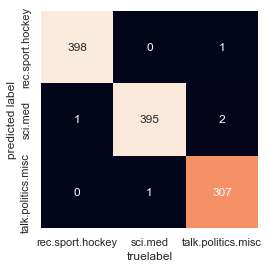

In [ ]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)

#plotting heatmap on confusion matrix
plt.xlabel('truelabel')
plt.ylabel('predicted label');

In [ ]:
#accuracy score computation

metrics.accuracy_score(test.target,labels)

0.995475113122172

In [ ]:
#predicting category on new data
def predict_category(s,train=train, model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

# Short Queries

In [ ]:
predict_category('Cricket and Hockey')

'rec.sport.hockey'

In [ ]:
predict_category('Football ')

'rec.sport.hockey'

In [ ]:
predict_category('Golf teams are good ')

'rec.sport.hockey'

In [ ]:
predict_category('Medicine Practice in university')

'sci.med'

In [ ]:
predict_category('minister of India')

'talk.politics.misc'

# Uppercase and lowercase testing

In [ ]:
predict_category('COVID Syndrome')

'sci.med'

In [ ]:
predict_category('WORLD ECONOMY')

'talk.politics.misc'

In [ ]:
predict_category('IPL gamE')

'rec.sport.hockey'

# sentence with Stopwords Querying

In [ ]:
predict_category('The freedom is always peoples right in life ')

'talk.politics.misc'

In [ ]:
predict_category('The medical universities are investing on research  ')

'sci.med'

In [ ]:
predict_category('The players are the root of the team ')

'rec.sport.hockey'

In [ ]:
predict_category('The medical universities are investing on research  ')

'sci.med'

# Complicated sentences to prove Hard clustering

In [ ]:
predict_category('Pneumonia affects millions of people and their life expectancy ')

'sci.med'

In [ ]:
predict_category('The Nation IS PRIDE OF ITS sports team and their talent')

'rec.sport.hockey'

In [ ]:
predict_category('The Covid virus decreased the population in Italy')

'talk.politics.misc'

# Long Queries

In [ ]:
predict_category('The Cancer patients require good doctors as well as good practioners as it require clear knowledge on medicine ')

'sci.med'

In [ ]:
predict_category('The Hockey team of India is good and they are the best across the world for their popularity ')

'rec.sport.hockey'

In [ ]:
predict_category('Cricket is more interesting than football evn though football adds more people to team')

'rec.sport.hockey'

In [ ]:
predict_category('President of India invited Prime minister of UK')

'talk.politics.misc'

# Queries with punctuations

In [ ]:
predict_category('the MINISTER JKLL;')

'talk.politics.misc'

In [ ]:
predict_category('THE PUBLIC and hjkkll the government protocoLSS')

'talk.politics.misc'

In [ ]:
predict_category('THE PUBLIC and hjkkll the government protocoLSS')

'talk.politics.misc'

In [ ]:
predict_category('Man of ****the match ***** !1!')

'rec.sport.hockey'

In [ ]:
predict_category('....Breast >>>cancer')

'sci.med'